In [1]:
import helpers
import dataset

2022-11-11 01:17:56.013181: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
import pandas as pd
import tensorflow_decision_forests as tfdf
from sklearn.ensemble import RandomForestClassifier

truthPath = './processed_truth/'
liePath = './processed_lie/'

testRatio = 0.2

Train, Xtrain, Ytrain, Xtest, Ytest = dataset.createDatasetGeneral(truthPath, liePath, testRatio, byPerson=True)

Persons 0 to 36.0 are in the training set, and 37.0 to 58.0 are in the testing set


In [19]:
counter = 0
for i in Ytrain:
    if i == 0:
        counter += 1

print(counter / len(Ytrain))

0.35150951839994493


In [20]:
counter = 0
for i in Ytest:
    if i == 0:
        counter += 1

print(counter / len(Ytest))

0.9999204518335852


In [9]:
def getTFRF():

    dataset = tfdf.keras.pd_dataframe_to_tf_dataset(Train, label="Result")

    #https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel
    TFmodel = tfdf.keras.RandomForestModel() #add params
    TFmodel.compile()
    TFmodel.fit(dataset)

    print(TFmodel.summary())

    res = pd.DataFrame(TFmodel.predict(tfdf.keras.pd_dataframe_to_tf_dataset(Xtest)))

    for i in range(res.shape[0]):
        if res.iloc[i,0] > 0.5: 
            res.iloc[i] = 1 
        else:
            res.iloc[i] = 0

    helpers.displayConfusion(Ytest, res)

    #return TFmodel

In [ ]:
def getSKRF():

    #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    SKRF = RandomForestClassifier(verbose=2) #add params
    SKRF.fit(Xtrain, Ytrain)

    helpers.displayConfusion(Ytest, SKRF.predict(Xtest))

    return SKRF

Use /var/folders/66/pn8653k51_75x5ksbpsy8hm80000gn/T/tmpnbkcx2hc as temporary training directory
Reading training dataset...


/Users/frank/opt/anaconda3/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core_inference.py:873: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)


Training dataset read in 0:00:00.922410. Found 58098 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /var/folders/66/pn8653k51_75x5ksbpsy8hm80000gn/T/tmpnbkcx2hc/model/ with prefix 1763d7ffb3c84b44


Model trained in 0:00:04.974497
Compiling model...


[INFO decision_forest.cc:639] Model loaded with 300 root(s), 179936 node(s), and 17 input feature(s).
[INFO abstract_model.cc:1249] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.
Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (17):
	AU01_r
	AU04_r
	AU10_r
	AU12_r
	AU45_r
	dgaze_0_x
	dgaze_0_y
	dgaze_angle_y
	gaze_0_x
	gaze_0_y
	gaze_0_z
	gaze_angle_x
	gaze_angle_y
	pose_Ry
	pose_Tx
	pose_Ty
	pose_Tz

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.       "__LABEL" 11.834917 ################
    2.     "dgaze_0_y" 11.559856 ###############
    3. "dgaze_angle_y" 11.536257 ###############
    4.        "AU01_r" 11.504479 ###############
    5.     "dgaze_0_x" 11.209063 ##############
    6.        "AU45_r" 10.815221 ##############
    7.      "gaze_0_y"  9.845046 ############
    8.        "AU10_r"  9.602619 ###########
    9.  

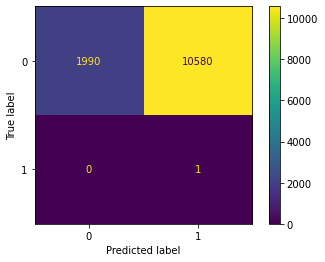

In [15]:
getTFRF()
# run the models here
# dataset.perdictSingleVideo('./singleVidCSV/', "tf", getTFRF())